1: Loading libraries and dataset

In [2]:
# libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [3]:
import os
os.chdir("/content")

In [4]:
df_old = pd.read_csv('coc_clans_dataset.csv', index_col = 0)

In [5]:
df_old.head()

,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,clan_versus_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,5213,...,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,1019,...,Unranked,1,0,0,1,0,0,Unranked,90,1752
#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,670,...,Unranked,2,0,0,1,0,0,Unranked,30,733
#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,457,...,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,399,...,Unranked,2,0,0,1,0,0,Unranked,23,674


In [6]:
df_old.describe()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,mean_member_level,mean_member_trophies
count,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06
mean,2.349883e+00,2.576062e+03,2.562565e+03,2.562565e+03,3.760651e+02,2.082535e-01,1.750428e+01,2.143728e-01,9.981437e+00,4.758147e+00,2.305894e+02,2.305894e+02,2.195218e+00,5.651079e-01,6.836864e+01,4.884267e+01,8.971466e+02
std,3.298436e+00,5.863921e+03,5.866313e+03,5.866313e+03,8.334661e+02,1.016368e+00,6.050237e+01,1.355269e+00,3.696328e+01,8.287075e+00,7.362564e+02,7.362564e+02,2.733998e+00,1.607310e+00,3.652351e+02,3.868762e+01,5.874875e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.520000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,4.940000e+02
50%,1.000000e+00,6.930000e+02,6.470000e+02,6.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,7.900000e+02
75%,2.000000e+00,1.801000e+03,1.867000e+03,1.867000e+03,4.000000e+02,0.000000e+00,6.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+01,1.155000e+03
max,3.600000e+01,5.472100e+04,5.168600e+04,5.168600e+04,6.553500e+04,2.610000e+02,1.565000e+03,3.190000e+02,1.220000e+03,5.000000e+01,5.500000e+03,5.500000e+03,1.500000e+01,1.000000e+01,5.866000e+03,3.150000e+02,5.466000e+03


2. Data cleaning! This includes:
- removing NaN values/columns
- removing qualitative columns
- transforming features with categorical values
  - one-hot and ordinal encoding

In [7]:
df_old.isnull().sum()

clan_name                              62
clan_type                               0
clan_description                  1351365
clan_location                     1451672
isFamilyFriendly                        0
clan_badge_url                          0
clan_level                              0
clan_points                             0
clan_builder_base_points                0
clan_versus_points                      0
required_trophies                       0
war_frequency                           0
war_win_streak                          0
war_wins                                0
war_ties                                0
war_losses                              0
clan_war_league                         0
num_members                             0
required_builder_base_trophies          0
required_versus_trophies                0
required_townhall_level                 0
clan_capital_hall_level                 0
clan_capital_points                     0
capital_league                    

In [8]:
# removing columns with qualitative data that we can't use, or just harder to work with (too many NaN values)
df = df_old.drop(columns=['clan_name', 'clan_description','clan_badge_url','clan_location', 'required_trophies',
                          'required_builder_base_trophies', 'required_versus_trophies', 'required_townhall_level'], axis=1)
df

,clan_type,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_frequency,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,num_members,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,closed,True,6,6887,5213,5213,moreThanOncePerWeek,1,93,0,31,Unranked,11,1,0,Unranked,83,1254
#2QC9Y0CQU,open,True,1,876,1019,1019,unknown,0,0,0,0,Unranked,1,0,0,Unranked,90,1752
#202CJRP2U,open,True,1,732,670,670,always,1,1,0,0,Unranked,2,0,0,Unranked,30,733
#2Y89RRGLY,open,True,2,1156,457,457,always,0,7,0,11,Bronze League I,2,1,0,Unranked,61,1156
#99PU9QPY,open,True,2,674,399,399,always,0,3,0,11,Unranked,2,0,0,Unranked,23,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,open,False,1,332,141,141,moreThanOncePerWeek,0,0,0,0,Unranked,2,0,0,Unranked,8,332
#VUV2URJ,open,False,1,317,71,71,unknown,0,0,0,0,Unranked,1,0,0,Unranked,12,635
#22C2PCPUG,open,False,1,379,338,338,unknown,0,0,0,1,Unranked,2,0,0,Unranked,17,379


In [9]:
"""
Now we transform features that are not numerical using different types of encoding.
Features with natural ordering:
clan_war_league
capital_league

Features with non-natural ordering:
war_frequency
clan_type

Boolean features:
isFamilyFriendly

"""
# boolean conversion to int
df['isFamilyFriendly'] = df['isFamilyFriendly'].astype(int)

# ordinal encoding of clan_war_league
unique = set(df["clan_war_league"])
unique

{'Bronze League I',
 'Bronze League II',
 'Bronze League III',
 'Champion League I',
 'Champion League II',
 'Champion League III',
 'Crystal League I',
 'Crystal League II',
 'Crystal League III',
 'Gold League I',
 'Gold League II',
 'Gold League III',
 'Master League I',
 'Master League II',
 'Master League III',
 'Silver League I',
 'Silver League II',
 'Silver League III',
 'Unranked'}

In [10]:
war_league_scale = {"Unranked":0, "Bronze League I":1, "Bronze League II":2, "Bronze League III":3, "Silver League I":4, "Silver League II":5, "Silver League III":6, "Gold League I":7, "Gold League II":8, "Gold League III":9, "Crystal League I":10, "Crystal League II":11, "Crystal League III":12, "Master League I":13, "Master League II":14, "Master League III":15, "Champion League I":16, "Champion League II":17, "Champion League III":18}

In [11]:
df["clan_war_league"] = df["clan_war_league"].replace(war_league_scale)
df["clan_war_league"]

clan_tag
#UQVQRJQ0      0
#2QC9Y0CQU     0
#202CJRP2U     0
#2Y89RRGLY     1
#99PU9QPY      0
              ..
#JP9Q8QQU      0
#VUV2URJ       0
#22C2PCPUG     0
#2YU8QJJU8    11
#2YRU29GGL     0
Name: clan_war_league, Length: 3559743, dtype: int64

In [12]:
# ordinal encoding of capital_league
unique = set(df["capital_league"])
unique

{'Bronze League I',
 'Bronze League II',
 'Bronze League III',
 'Champion League I',
 'Champion League II',
 'Champion League III',
 'Crystal League I',
 'Crystal League II',
 'Crystal League III',
 'Gold League I',
 'Gold League II',
 'Gold League III',
 'Legend League',
 'Master League I',
 'Master League II',
 'Master League III',
 'Silver League I',
 'Silver League II',
 'Silver League III',
 'Titan League I',
 'Titan League II',
 'Titan League III',
 'Unranked'}

In [13]:
capital_league_scale = {"Unranked":0, "Bronze League I":1, "Bronze League II":2, "Bronze League III":3, "Silver League I":4, "Silver League II":5, "Silver League III":6, "Gold League I":7, "Gold League II":8, "Gold League III":9, "Crystal League I":10, "Crystal League II":11, "Crystal League III":12, "Master League I":13, "Master League II":14, "Master League III":15, "Champion League I":16, "Champion League II":17, "Champion League III":18, "Titan League I":19, "Titan League II":20, "Titan League III":21,"Legend League":22}
df["capital_league"] = df["capital_league"].replace(capital_league_scale)
df["capital_league"]

clan_tag
#UQVQRJQ0     0
#2QC9Y0CQU    0
#202CJRP2U    0
#2Y89RRGLY    0
#99PU9QPY     0
             ..
#JP9Q8QQU     0
#VUV2URJ      0
#22C2PCPUG    0
#2YU8QJJU8    0
#2YRU29GGL    0
Name: capital_league, Length: 3559743, dtype: int64

In [14]:
# one-hot encoding war_frequency
df = pd.get_dummies(df, columns=['war_frequency', ])
df['war_frequency_always'] = df['war_frequency_always'].astype(int)
df['war_frequency_lessThanOncePerWeek'] = df['war_frequency_lessThanOncePerWeek'].astype(int)
df['war_frequency_moreThanOncePerWeek'] = df['war_frequency_moreThanOncePerWeek'].astype(int)
df['war_frequency_never'] = df['war_frequency_never'].astype(int)
df['war_frequency_oncePerWeek'] = df['war_frequency_oncePerWeek'].astype(int)
df['war_frequency_unknown'] = df['war_frequency_unknown'].astype(int)
df

,clan_type,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,...,clan_capital_points,capital_league,mean_member_level,mean_member_trophies,war_frequency_always,war_frequency_lessThanOncePerWeek,war_frequency_moreThanOncePerWeek,war_frequency_never,war_frequency_oncePerWeek,war_frequency_unknown
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,closed,1,6,6887,5213,5213,1,93,0,31,...,0,0,83,1254,0,0,1,0,0,0
#2QC9Y0CQU,open,1,1,876,1019,1019,0,0,0,0,...,0,0,90,1752,0,0,0,0,0,1
#202CJRP2U,open,1,1,732,670,670,1,1,0,0,...,0,0,30,733,1,0,0,0,0,0
#2Y89RRGLY,open,1,2,1156,457,457,0,7,0,11,...,0,0,61,1156,1,0,0,0,0,0
#99PU9QPY,open,1,2,674,399,399,0,3,0,11,...,0,0,23,674,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,open,0,1,332,141,141,0,0,0,0,...,0,0,8,332,0,0,1,0,0,0
#VUV2URJ,open,0,1,317,71,71,0,0,0,0,...,0,0,12,635,0,0,0,0,0,1
#22C2PCPUG,open,0,1,379,338,338,0,0,0,1,...,0,0,17,379,0,0,0,0,0,1


In [15]:
# one-hot encoding clan_type
df = pd.get_dummies(df, columns=['clan_type', ])
df['clan_type_closed'] = df['clan_type_closed'].astype(int)
df['clan_type_inviteOnly'] = df['clan_type_inviteOnly'].astype(int)
df['clan_type_open'] = df['clan_type_open'].astype(int)
df

,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,...,mean_member_trophies,war_frequency_always,war_frequency_lessThanOncePerWeek,war_frequency_moreThanOncePerWeek,war_frequency_never,war_frequency_oncePerWeek,war_frequency_unknown,clan_type_closed,clan_type_inviteOnly,clan_type_open
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,1,6,6887,5213,5213,1,93,0,31,0,...,1254,0,0,1,0,0,0,1,0,0
#2QC9Y0CQU,1,1,876,1019,1019,0,0,0,0,0,...,1752,0,0,0,0,0,1,0,0,1
#202CJRP2U,1,1,732,670,670,1,1,0,0,0,...,733,1,0,0,0,0,0,0,0,1
#2Y89RRGLY,1,2,1156,457,457,0,7,0,11,1,...,1156,1,0,0,0,0,0,0,0,1
#99PU9QPY,1,2,674,399,399,0,3,0,11,0,...,674,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,0,1,332,141,141,0,0,0,0,0,...,332,0,0,1,0,0,0,0,0,1
#VUV2URJ,0,1,317,71,71,0,0,0,0,0,...,635,0,0,0,0,0,1,0,0,1
#22C2PCPUG,0,1,379,338,338,0,0,0,1,0,...,379,0,0,0,0,0,1,0,0,1


3. Pre-processing! Our pre-processing includes:
- Removing highly-correlated features
  - Avoid multicollinearity
- Splitting data into test/train sets
  - randomly sampling ~ 50K clans
  - undersampling: majority of data is weaker clans
  - for linear svm: scaling the data

In [16]:
# check correlatation between clan points and other potential features
corr = df[['clan_points', 'clan_capital_points', 'clan_level', 'clan_builder_base_points', 'clan_versus_points', 'war_win_streak','war_wins', 'war_ties', 'war_losses', 'num_members', 'mean_member_level', 'mean_member_trophies', 'clan_capital_hall_level']].corr()
corr.style.background_gradient(cmap='coolwarm')
# Note: this doesn't include the correlation values for columns with categorical data. We will deal with those later.

,clan_points,clan_capital_points,clan_level,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,num_members,mean_member_level,mean_member_trophies,clan_capital_hall_level
clan_points,1.000000,0.862496,0.824389,0.987212,0.987212,0.223504,0.680949,0.180780,0.471435,0.920488,0.605944,0.706063,0.913003
clan_capital_points,0.862496,1.000000,0.710951,0.831638,0.831638,0.201750,0.607014,0.132898,0.372918,0.737654,0.465679,0.577706,0.823345
clan_level,0.824389,0.710951,1.000000,0.816230,0.816230,0.222638,0.902491,0.297198,0.620996,0.720731,0.595113,0.640521,0.826961
clan_builder_base_points,0.987212,0.831638,0.816230,1.000000,1.000000,0.216458,0.667594,0.178884,0.471627,0.922360,0.621181,0.706672,0.910841
clan_versus_points,0.987212,0.831638,0.816230,1.000000,1.000000,0.216458,0.667594,0.178884,0.471627,0.922360,0.621181,0.706672,0.910841
war_win_streak,0.223504,0.201750,0.222638,0.216458,0.216458,1.000000,0.196406,0.077511,0.081841,0.221279,0.138575,0.155757,0.230910
war_wins,0.680949,0.607014,0.902491,0.667594,0.667594,0.196406,1.000000,0.324560,0.596809,0.568323,0.500557,0.530740,0.662279
war_ties,0.180780,0.132898,0.297198,0.178884,0.178884,0.077511,0.324560,1.000000,0.395787,0.174496,0.163385,0.151579,0.190822
war_losses,0.471435,0.372918,0.620996,0.471627,0.471627,0.081841,0.596809,0.395787,1.000000,0.419300,0.355180,0.374324,0.465148
num_members,0.920488,0.737654,0.720731,0.922360,0.922360,0.221279,0.568323,0.174496,0.419300,1.000000,0.457812,0.541583,0.830745


In [17]:
# Based on the above correlations, we can assume that clan_versus_points
# and clan_builder_base_points are the same, so we can remove one.
df = df.drop(columns=['clan_versus_points'], axis=1)
# It seems that some variables are highly correlated with our target variable and each other, so let's remove those.
df = df.drop(columns=['clan_builder_base_points', 'num_members', 'clan_capital_hall_level'], axis=1)
# We may experiment with adding these columns back later

In [18]:
df.columns

Index(['isFamilyFriendly', 'clan_level', 'clan_points', 'war_win_streak',
       'war_wins', 'war_ties', 'war_losses', 'clan_war_league',
       'clan_capital_points', 'capital_league', 'mean_member_level',
       'mean_member_trophies', 'war_frequency_always',
       'war_frequency_lessThanOncePerWeek',
       'war_frequency_moreThanOncePerWeek', 'war_frequency_never',
       'war_frequency_oncePerWeek', 'war_frequency_unknown',
       'clan_type_closed', 'clan_type_inviteOnly', 'clan_type_open'],
      dtype='object')

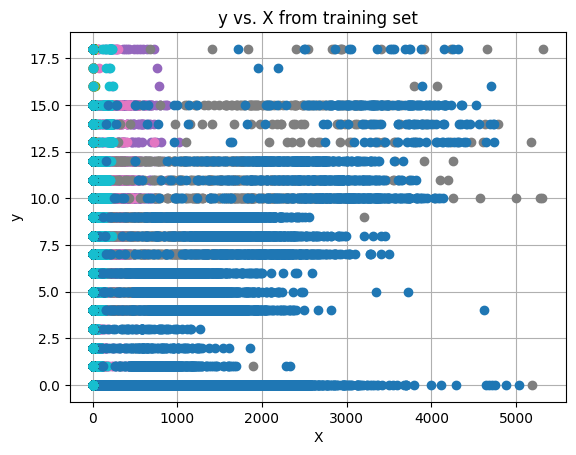

In [29]:
# Now we can split the data and randomly select 1000 features!
# 50000 was chosen to allow Linear SVM to run without taking exorbent amounts of time

df_sample = df.sample(n=50000)

features = ['isFamilyFriendly', 'clan_level',
       'war_win_streak', 'war_wins', 'war_ties', 'war_losses',
       'clan_capital_points', 'capital_league', 'mean_member_level',
        'mean_member_trophies', 'war_frequency_always', 'war_frequency_lessThanOncePerWeek',
        'war_frequency_moreThanOncePerWeek', 'war_frequency_never',
       'war_frequency_oncePerWeek', 'war_frequency_unknown',
       'clan_type_closed', 'clan_type_inviteOnly', 'clan_type_open']

# Taking all features for prediction
# Starting with a column of ones for a w_0 term
X = np.empty((50000,1))
#create X from all features excluding clan_war_league
for feature in features:
  new_col = df_sample[feature].to_numpy()
  new_col = new_col.reshape(new_col.shape[0], 1)
  X = np.append(X, new_col, axis=1)
#predicting on clan_war_league
y = df_sample['clan_war_league'].to_numpy()

#creating a scaler for use later in linear svm
sclr = StandardScaler()
sclr = sclr.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_train = y_train.reshape(y_train.shape[0], 1)

# Let's plot X_train and y_train to see the distribution of training data
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

In [22]:
print(X_train.shape)

(114, 20)


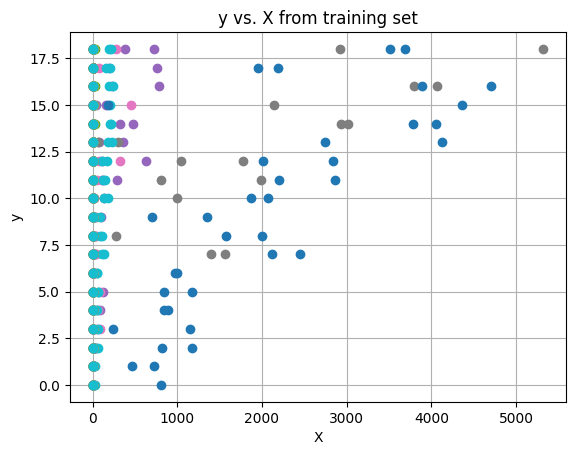

In [30]:
# Since most points are centered around the bottom of the graph, we need to make sure we
# are representing all data points properly, so we will undersample:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

y_test = y_test.reshape(y_test.shape[0], 1)
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

4. The SVM implementation is below. We're  This includes:
- Linear Kernel SVM with regularization C = 1
- Linear Kernel SVM with regularization C = 1000
- Linear Kernel SVM with regularization C = 0.1
- Polynomial Kernel SVM
- Radial-basis Kernel SVM

In [23]:
from sklearn.svm import SVC

In [307]:
#We'll scale the data specifically for linear SVM to avoid extra influence from outliers
X_train_scaled = sclr.transform(X_train)

#Starting with linear kernel SVM on the data with C=1 via scikit learn
model = SVC(kernel='linear', C=0.1)
model.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear')

In [308]:
#Evaluating the model performance based on our validation data:
X_test_scaled = sclr.transform(X_test)
model.score(X_test_scaled, y_test)

0.0652

In [214]:
# for further evaluation and vizualization,pick two features we think will correlate well to aid in visualization=
f1 = 6 #clan_capital_points
f2 = 2 #war_win_streak

In [204]:
#train SVM model on this data (unscaled for plotting purposes)
X_train_vis = X_train[:, [f1, f2]]
model.fit(X_train_vis, y_train)

SVC(kernel='linear')

In [205]:
#Evaluation
X_test_vis = X_test[:, [f1, f2]]
model.score(X_test_vis, y_test)

0.73568

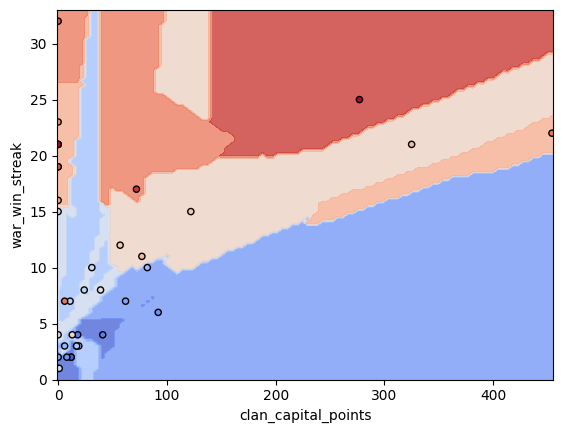

In [206]:
#visualization
from sklearn.inspection import DecisionBoundaryDisplay
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_vis,
    response_method="predict",
    cmap = plt.cm.coolwarm,
    alpha = 0.8,
    ax = ax,
    xlabel = features[f1],
    ylabel = features[f2],
)
ax.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [212]:
#Back to the full dataset, we'll run the same kernel with C = 1000
model = SVC(kernel='linear', C=1000)
model.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='linear')

In [213]:
#Evaluating the model performance based on our validation data:
model.score(X_test_scaled, y_test)

0.3624

In [215]:
#Same as before, visualization on the two parameters that would correlate most to this via intuition
model.fit(X_train_vis, y_train)

SVC(C=1000, kernel='linear')

In [216]:
model.score(X_test_vis, y_test)

0.72064

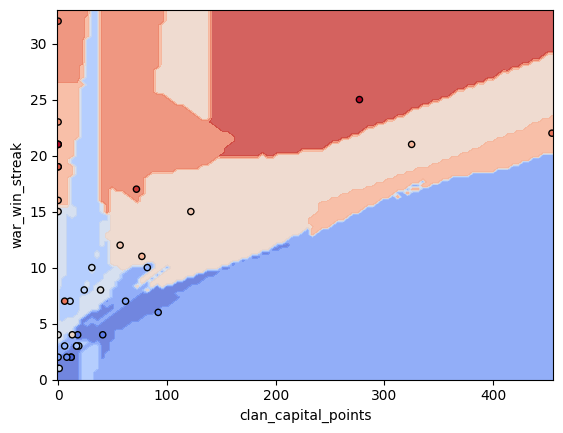

In [217]:
#visualization
from sklearn.inspection import DecisionBoundaryDisplay
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_vis,
    response_method="predict",
    cmap = plt.cm.coolwarm,
    alpha = 0.8,
    ax = ax,
    xlabel = features[f1],
    ylabel = features[f2],
)
ax.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [312]:
#One more time with linear SVM at C= 0.1
model = SVC(kernel='linear', C=0.1)
model.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear')

In [313]:
#Evaluating the model performance based on our validation data:
model.score(X_test_scaled, y_test)

0.0652

In [314]:
#Same as before, visualization on the two parameters that would correlate most to this via intuition
model.fit(X_train_vis, y_train)
model.score(X_test_vis, y_test)

0.75608

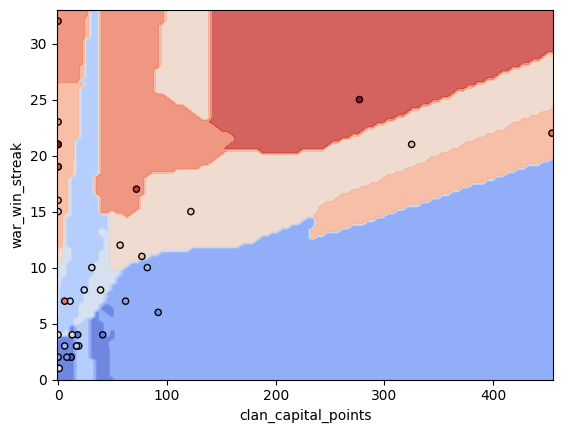

In [315]:
#visualization
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_vis,
    response_method="predict",
    cmap = plt.cm.coolwarm,
    alpha = 0.8,
    ax = ax,
    xlabel = features[f1],
    ylabel = features[f2],
)
ax.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [316]:
#We'll now try the Polynomial kernel with degree=2
model = SVC(kernel="poly", degree=2)
model.fit(X_train_scaled, y_train)

SVC(degree=2, kernel='poly')

In [317]:
#Validation
model.score(X_test_scaled, y_test)

0.06536

In [318]:
#visualization
model.fit(X_train_vis, y_train)
model.score(X_test_vis, y_test)

0.78776

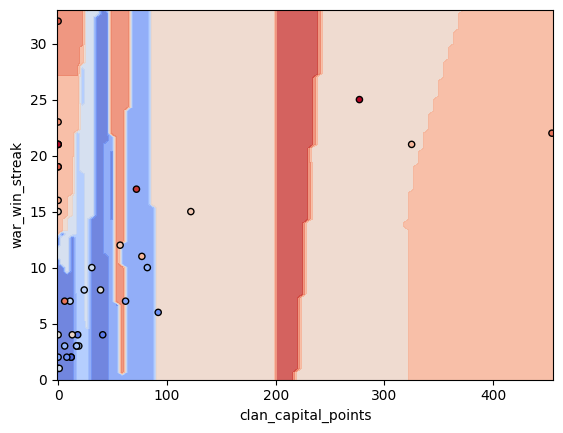

In [319]:
#visualization
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_vis,
    response_method="predict",
    cmap = plt.cm.coolwarm,
    alpha = 0.8,
    ax = ax,
    xlabel = features[f1],
    ylabel = features[f2],
)
ax.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [302]:
#trying d and r varying from 2-10 each:
svm_vals = {
    "Type" : [],
    "Degree" : [],
    "Radius" : [],
    "Regularization": [],
    "Score": []
}
for d in range(1, 6):
  for r in range(1, 6):
    for c in np.logspace(1, 16, 4, base=2):
    #We'll now try the Polynomial kernel with degree=2
      model = SVC(kernel="poly", degree=d, coef0=r, C=c)
      model.fit(X_train_scaled, y_train)
      score = model.score(X_test_scaled, y_test)
      svm_vals["Type"].append("Poly")
      svm_vals["Degree"].append(d)
      svm_vals["Radius"].append(r)
      svm_vals["Regularization"].append(c)
      svm_vals["Score"].append(score)
table = pd.DataFrame(data=svm_vals)
table

,Type,Degree,Radius,Regularization,Score
0,Poly,1,1,2.0,0.06024
1,Poly,1,1,64.0,0.31808
2,Poly,1,1,2048.0,0.36240
3,Poly,1,1,65536.0,0.36240
4,Poly,1,2,2.0,0.06024
...,...,...,...,...,...
95,Poly,5,4,65536.0,0.35256
96,Poly,5,5,2.0,0.35488
97,Poly,5,5,64.0,0.35488
98,Poly,5,5,2048.0,0.35488


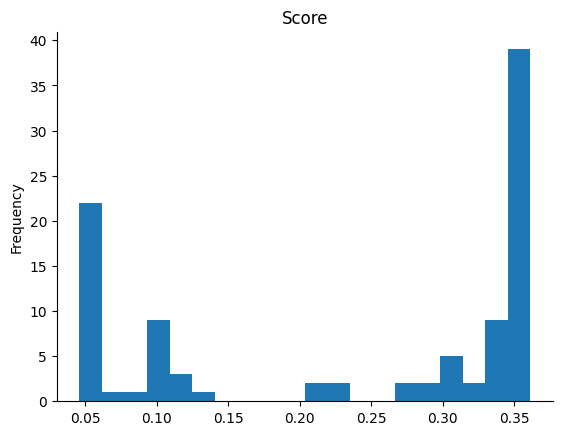

In [300]:
from matplotlib import pyplot as plt
table['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [303]:
svm_vals = {
    "Type" : [],
    "Gamma" : [],
    "Regularization": [],
    "Score": []
}
#RBF Kernel
for g in np.logspace(1, 16, 4, base=2):
  for c in np.logspace(1, 16, 4, base=2):
      model = SVC(kernel="rbf", gamma=g, C=c)
      model.fit(X_train_scaled, y_train)
      model.score(X_test_scaled, y_test)
      svm_vals["Type"].append("RBF")
      svm_vals["Gamma"].append(g)
      svm_vals["Regularization"].append(c)
      svm_vals["Score"].append(score)
table = pd.DataFrame(data=svm_vals)
table

,Type,Gamma,Regularization,Score
0,Poly,2.0,2.0,0.35488
1,Poly,2.0,64.0,0.35488
2,Poly,2.0,2048.0,0.35488
3,Poly,2.0,65536.0,0.35488
4,Poly,64.0,2.0,0.35488
5,Poly,64.0,64.0,0.35488
6,Poly,64.0,2048.0,0.35488
7,Poly,64.0,65536.0,0.35488
8,Poly,2048.0,2.0,0.35488
9,Poly,2048.0,64.0,0.35488


In [310]:
#trying d and r varying from 2-10 each:
svm_vals = {
    "Type" : [],
    "Regularization": [],
    "Score": []
}
for c in np.logspace(0, 16, 16, base=2):
    #We'll now try the Polynomial kernel with degree=2
      model = SVC(kernel="linear", C=c)
      model.fit(X_train_scaled, y_train)
      score = model.score(X_test_scaled, y_test)
      svm_vals["Type"].append("Linear")
      svm_vals["Regularization"].append(c)
      svm_vals["Score"].append(score)
table = pd.DataFrame(data=svm_vals)
table

,Type,Regularization,Score
0,Linear,1.000000,0.35400
1,Linear,2.094588,0.36264
2,Linear,4.387300,0.36248
3,Linear,9.189587,0.36240
4,Linear,19.248401,0.36240
5,Linear,40.317474,0.36240
6,Linear,84.448506,0.36240
7,Linear,176.884849,0.36240
8,Linear,370.500925,0.36240
9,Linear,776.046882,0.36240


In [322]:
model = SVC(kernel="rbf", gamma=2, C=1)
model.fit(X_train_vis, y_train)
model.score(X_test_vis, y_test)

0.55592

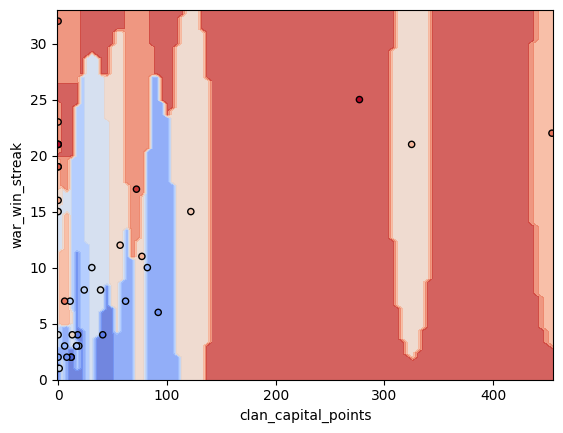

In [323]:
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_vis,
    response_method="predict",
    cmap = plt.cm.coolwarm,
    alpha = 0.8,
    ax = ax,
    xlabel = features[f1],
    ylabel = features[f2],
)
ax.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")